In [5]:
import biokbase.data_api
import biokbase.data_api.genome_annotation
import biokbase.data_api.display

In [6]:
def get_genome_summary(genome_annotation=None):
    if genome_annotation == None:
        raise TypeError("No GenomeAnnotation object given.")
    elif genome_annotation.get_typestring().split('-')[0] not in biokbase.data_api.genome_annotation.TYPES:
        raise TypeError("{0} is not a recognized GenomeAnnotation type.".format(type(genome_annotation)))
        
    taxon = genome_annotation.get_taxon()
    assembly = genome_annotation.get_assembly()
    
    overview = dict()
    
    #get tax info
    taxon_details = dict()
    taxon_details["taxonomic_id"] = taxon.get_taxonomic_id()
    taxon_details["kingdom"] = taxon.get_kingdom()
    taxon_details["domain"] = taxon.get_domain()
    taxon_details["genetic_code"] = taxon.get_genetic_code()
    taxon_details["scientific_name"] = taxon.get_scientific_name()
    taxon_details["aliases"] = taxon.get_aliases()
    taxon_details["scientific_lineage"] = taxon.get_scientific_lineage()

    overview["taxon"] = taxon_details
    
    #get assembly info
    assembly_details = dict()
    assembly_details["number_of_contigs"] = assembly.get_number_contigs()
    assembly_details["total_length"] = assembly.get_dna_size()
    assembly_details["total_gc_content"] = assembly.get_gc_content()
    assembly_details["contig_length"] = assembly.get_contig_lengths()
    assembly_details["contig_gc_content"] = assembly.get_contig_gc_content()
    
    overview["assembly"] = assembly_details
    
    #get annotation info
    annotation_details = dict()
    annotation_details["feature_types"] = genome_annotation.get_feature_types()
    annotation_details["feature_type_descriptions"] = genome_annotation.get_feature_type_descriptions(annotation_details["feature_types"])
    annotation_details["feature_type_counts"] = genome_annotation.get_feature_type_counts(annotation_details["feature_types"])
    
    overview["annotation"] = annotation_details
    
    return overview

In [10]:
def plot_summaries(overview):
    import numpy
    import matplotlib
    import matplotlib.pyplot as plt
    %matplotlib inline

    ft_labels = overview["annotation"]["feature_type_counts"].keys()
    ft_counts = overview["annotation"]["feature_type_counts"].values()

    fig1, ax = plt.subplots(ncols=1, figsize=(16,4))
    ax.barh(numpy.arange(len(ft_counts)), ft_counts, facecolor='g', alpha=0.75)
    ax.set_title("Feature Type Counts from {0} to {1}".format(min(ft_counts),max(ft_counts)))
    ax.set_xlabel("Sequence length (bp)")
    ax.set_ylabel("Count")
    ax.set_yticklabels(ft_labels, minor=False)

    contig_lengths = overview["assembly"]["contig_length"].values()
    bins = 20

    fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(16,12))
    ax0.hist(contig_lengths, bins, facecolor='g', alpha=0.75)
    ax0.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%.2e"))
    ax0.set_title("Contig Lengths from {0} to {1}".format(min(contig_lengths),max(contig_lengths)))
    ax0.set_xlabel("Sequence length (bp)")
    ax0.set_ylabel("Count")

    contig_gc_values = [x*100.0 for x in sorted(overview["assembly"]["contig_gc_content"].values())]

    ax1.plot(contig_gc_values)
    ax1.set_title("Contig GC % from {0:.2f} to {1:.2f}".format(min(contig_gc_values),max(contig_gc_values)))
    ax1.set_xlabel("Contigs")
    ax1.set_ylabel("GC %")

    plt.show()    



################################################################################
################################################################################


kb|g.3899
{'annotation': {'feature_type_counts': {u'CDS': 35387,
                                        u'locus': 33602,
                                        u'mRNA': 41671},
                'feature_type_descriptions': {'CDS': 'Coding Sequence',
                                              'mRNA': 'Messenger RNA'},
                'feature_types': [u'locus', u'CDS', u'mRNA']},
 'assembly': {'contig_gc_content': {u'kb|g.3899.c.0': 0.3629384119421536,
                                    u'kb|g.3899.c.1': 0.4476948904950344,
                                    u'kb|g.3899.c.2': 0.3619811530296169,
                                    u'kb|g.3899.c.3': 0.35859657658591565,
                                    u'kb|g.3899.c.4': 0.3632181904131445,
                                    u'kb|g.3899.c.5': 0.3592523319862592,
   

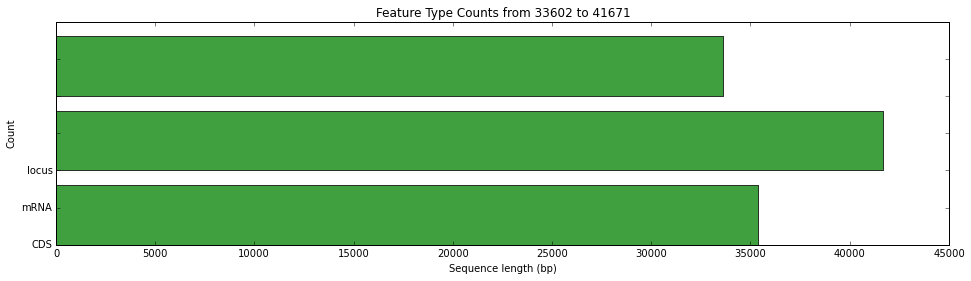

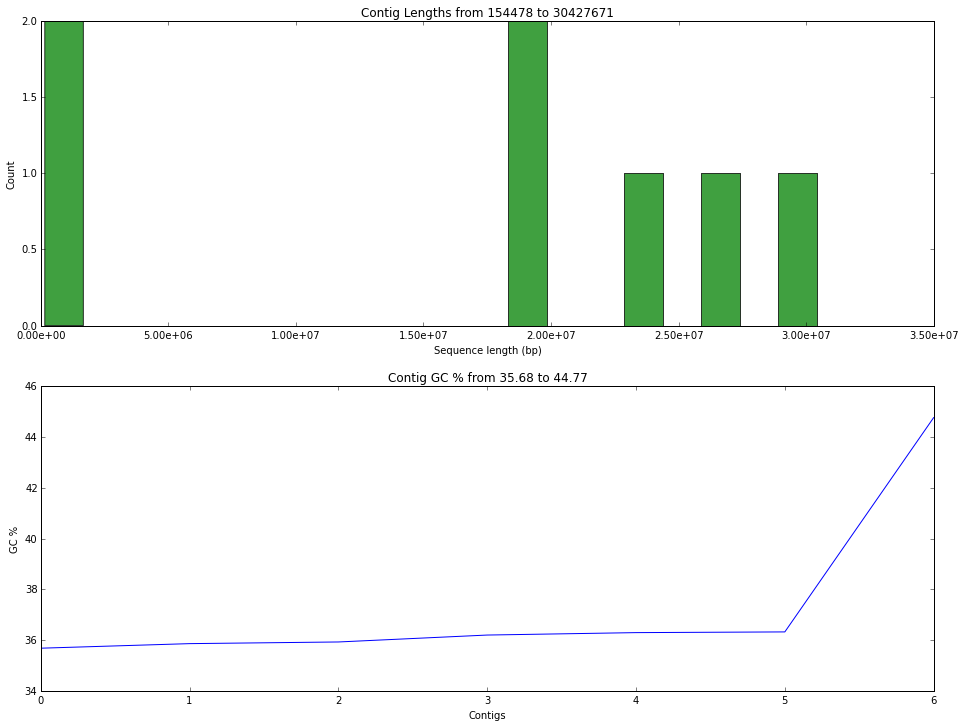

Total time to summarize existing Genome Annotations, Taxons, Assemblies : 1:14:14.185803


In [8]:
import pprint
import datetime

def parse_all_existing_annotations():
    annotations = dict()
    for x in object_list:
        if x.type.startswith("KBaseGenomes.Genome"):
            annotations[x.name] = x
    return annotations

b = biokbase.data_api.browse(1011)

object_list = b.ls()

#test = b["kb|g.3157"]

# selected 4 Eukaryotes as a sample
arabidopsis = b["kb|g.3899"]
#glycine_max = b["kb|g.217869"]
#populus_trichocarpa = b["kb|g.3907"]
#eucalyptus_grandis = b["kb|g.217867"]

annotations = {
    arabidopsis.name: arabidopsis.object,
#    glycine_max.name: glycine_max.object,
#    populus_trichocarpa.name: populus_trichocarpa.object,
#    eucalyptus_grandis.name: eucalyptus_grandis.object
}

#annotations = {test.name: test.object}

start = datetime.datetime.utcnow()
for n in annotations:
    print '\n'
    print '#'*80
    print '#'*80
    print '\n'    
    
    print n
    overview = get_genome_summary(annotations[n])
    pprint.pprint(overview)
    
    print '\n'
    print '#'*80
    print '#'*80
    print '\n'

    biokbase.data_api.display.Organism(genome_annotation)
    plot_summaries(overview)
end = datetime.datetime.utcnow()

print "Total time to summarize existing Genome Annotations, Taxons, Assemblies : {0}".format(end - start)



################################################################################
################################################################################


kb|g.3899
{'annotation': {'feature_type_counts': {u'CDS': 35387,
                                        u'gene': 33602,
                                        u'mRNA': 41671},
                'feature_type_descriptions': {'CDS': 'Coding Sequence',
                                              'mRNA': 'Messenger RNA'},
                'feature_types': [u'gene', u'mRNA', u'CDS']},
 'assembly': {'contig_gc_content': {u'kb|g.3899.c.0': 0.3629384119421536,
                                    u'kb|g.3899.c.1': 0.4476948904950344,
                                    u'kb|g.3899.c.2': 0.3619811530296169,
                                    u'kb|g.3899.c.3': 0.35859657658591565,
                                    u'kb|g.3899.c.4': 0.3632181904131445,
                                    u'kb|g.3899.c.5': 0.3592523319862592,
     

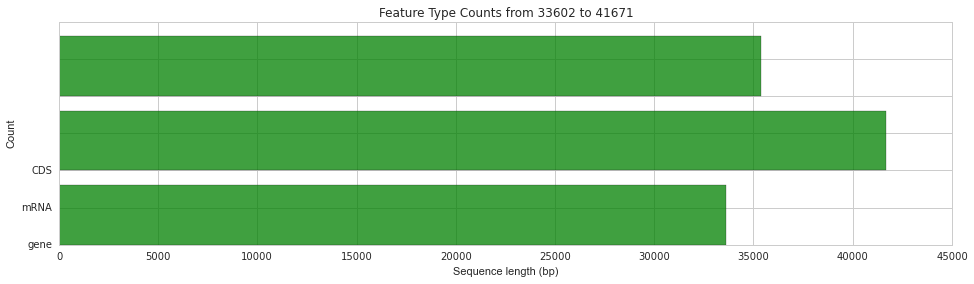

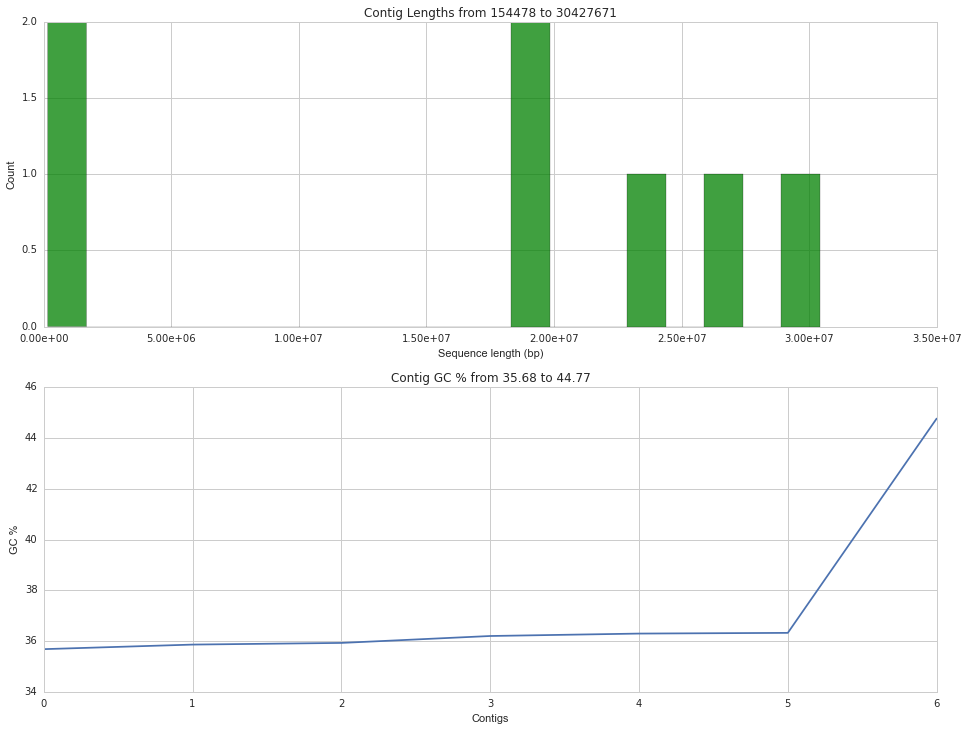

Total time to summarize prototype Genome Annotations, Taxons, Assemblies : 0:12:58.582740


In [25]:
def parse_all_prototype_annotations():
    annotations = dict()
    for x in object_list:
        if x.type.startswith("KBaseGenomesCondensedPrototypeV2.GenomeAnnotation"):
            annotations[x.name] = x
    return annotations

b = biokbase.data_api.browse(1013)

object_list = b.ls()

#test = b["kb|g.3157"]

#annotations = {test.name: test.object}

# selected 4 Eukaryotes as a sample
arabidopsis = b["kb|g.3899"]
#glycine_max = b["kb|g.217869"]
#populus_trichocarpa = b["kb|g.3907"]
#eucalyptus_grandis = b["kb|g.217867"]

annotations = {
    arabidopsis.name: arabidopsis.object,
#    glycine_max.name: glycine_max.object,
#    populus_trichocarpa.name: populus_trichocarpa.object,
#    eucalyptus_grandis.name: eucalyptus_grandis.object
}



start = datetime.datetime.utcnow()
for n in annotations:
    print '\n'
    print '#'*80
    print '#'*80
    print '\n'    
    
    print n
    overview = get_genome_summary(annotations[n])
    pprint.pprint(overview)
    
    print '\n'
    print '#'*80
    print '#'*80
    print '\n'
    
    biokbase.data_api.display.Organism(annotations[n])
    plot_summaries(overview)
end = datetime.datetime.utcnow()

print "Total time to summarize prototype Genome Annotations, Taxons, Assemblies : {0}".format(end - start)

_ObjectInfo(objid=138, name=u'kb|g.3899_assembly', type=u'KBaseGenomesCondensedPrototypeV2.Assembly-1.1', save_date=u'2015-08-02T19:19:04+0000', version=1, saved_by=u'kbasetest', wsid=1013, workspace=u'PrototypeReferenceGenomes', chsum=u'41c93e9e1df3148003d71cc74af51cac', size=2229, meta=None)


ValueError: If using all scalar values, you must pass an index